In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = np.random.rand(150, 1) * 2 - 1
data = np.append(data, np.power(data[:, 0], 2).reshape(-1, 1), axis=1)
data = np.append(data, np.power(data[:, 0], 3).reshape(-1, 1), axis=1)
label = (0.5 * data[:, 0] + 0.75 * data[:, 1] + 3 * data[:, 2] + 4).reshape(-1, 1)
sortarg = np.argsort(data[:, 0])
data = data[sortarg]
label = label[sortarg]
data_input = tf.placeholder(tf.float32, (None, 3), name='data_input')
data_label = tf.placeholder(tf.float32, (None, 1), name='data_label')
A1 = tf.contrib.layers.fully_connected(data_input, 1, activation_fn=None, weights_initializer=tf.zeros_initializer(), scope='A1')
with tf.variable_scope('A1', reuse=True):
    W = tf.get_variable('weights')
    B = tf.get_variable('biases')
cost_no_reg = tf.losses.mean_squared_error(label, A1)
cost_reg = tf.losses.mean_squared_error(label, A1) + 0.01 * tf.reduce_sum(tf.square(W))
cost_reg_10 = tf.losses.mean_squared_error(label, A1) + 0.01 * tf.reduce_sum(tf.pow(W, 10))
opt_minimize_no_reg = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost_no_reg)
opt_minimize_reg = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost_reg)
opt_minimize_reg_10 = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost_reg_10)
sess = tf.Session()

In [3]:
sess.run(tf.global_variables_initializer())
for i in range(10000):
    sess.run(opt_minimize_no_reg, feed_dict={data_input:data, data_label:label})
WW = sess.run(W)
BB = sess.run(B)
AA = np.squeeze(np.dot(data, WW) + BB)
print(WW, BB)

[[0.5536899 ]
 [0.74895734]
 [2.9137404 ]] [4.0003247]


In [4]:
sess.run(tf.global_variables_initializer())
for i in range(10000):
    sess.run(opt_minimize_reg, feed_dict={data_input:data, data_label:label})
WW_reg = sess.run(W)
BB_reg = sess.run(B)
AA_reg = np.squeeze(np.dot(data, WW_reg) + BB_reg)
print(WW_reg, BB_reg)

[[0.9394344 ]
 [0.66210777]
 [2.2088406 ]] [4.027576]


In [5]:
sess.run(tf.global_variables_initializer())
for i in range(10000):
    sess.run(opt_minimize_reg_10, feed_dict={data_input:data, data_label:label})
WW_reg_10 = sess.run(W)
BB_reg_10 = sess.run(B)
AA_reg_10 = np.squeeze(np.dot(data, WW_reg_10) + BB_reg_10)
print(WW_reg_10, BB_reg_10)

[[1.1365346]
 [0.6738426]
 [1.1156877]] [4.0126557]


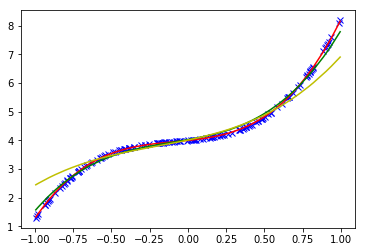

In [6]:
plt.plot(data[:, 0], label, 'bx')
plt.plot(data[:, 0], AA, 'r-')
plt.plot(data[:, 0], AA_reg, 'g-')
plt.plot(data[:, 0], AA_reg_10, 'y-')
plt.show()